# Notebook 5: Simple ML Regression

Author: Randy J. Chase

### Goal: Basic training a ML using a single feature/predictor/input and a single ML model

#### Reminder of Problem Statement

Before we jump into the ML, I want to remind you of the ML task we want to accomplish in the paper. 

1. Does this image contain a thunderstorm? <-- Classification
2. How many lightning flashes are in this image? <-- Regression

#### Background

For the training of regression problems is basically the same as the classification. We will still use the same steps as the previous notebook, just with a small changed to the labels ```y```. 

#### Step 1 & 2: Import packages and load data for Regression  
We only want 1 feature again to make things simple, which is feature 0. We also will need to change ```class_labels``` to false.

In [1]:
#needed packages 
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

#plot parameters that I personally like, feel free to make these your own.
import matplotlib
matplotlib.rcParams['axes.facecolor'] = [0.9,0.9,0.9] #makes a grey background to the axis face
matplotlib.rcParams['axes.labelsize'] = 14 #fontsize in pts
matplotlib.rcParams['axes.titlesize'] = 14 
matplotlib.rcParams['xtick.labelsize'] = 12 
matplotlib.rcParams['ytick.labelsize'] = 12 
matplotlib.rcParams['legend.fontsize'] = 12 
matplotlib.rcParams['legend.facecolor'] = 'w' 
matplotlib.rcParams['savefig.transparent'] = False

#make default resolution of figures much higher (i.e., High definition)
%config InlineBackend.figure_format = 'retina'

#import some helper functions for our other directory.
import sys
sys.path.insert(1, '../scripts/')
from aux_functions import load_n_combine_df
(X_train,y_train),(X_validate,y_validate),(X_test,y_test) = load_n_combine_df(path_to_data='../datasets/sevir/',features_to_keep=np.arange(0,1,1),class_labels=False)

Let's check to make sure the labels are indeed decimal numbers instead of 0's and 1's. 

Text(0.5, 0, 'number of flahses')

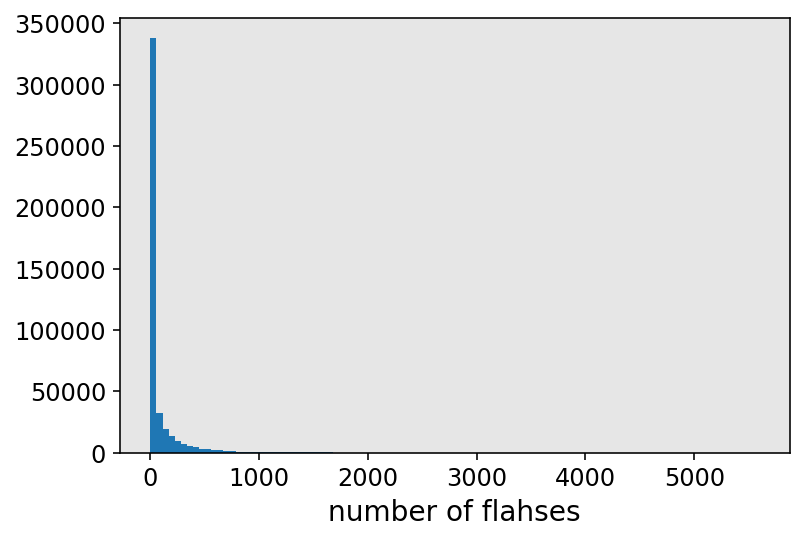

In [6]:
plt.hist(y_train,bins=100)
plt.xlabel('number of flahses')

Great, it is indeed more than just 0's and 1's, but something you'll notice right here,there are ALOT of no flash images. You will see if we plot the number of flashes as a function of the minimum brightness temperature it might be very difficult to fit a linear method (i.e., Linear regression) to the data

Text(0, 0.5, 'Number of flashes')

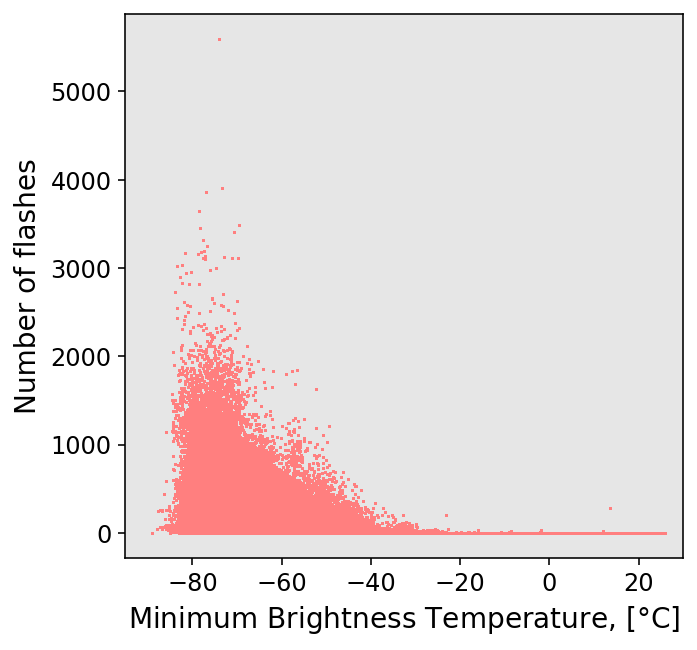

In [18]:
#this is something to help make the ticks show up where I want them 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#color I like. The order of ratios is [Red,Green,Blue]
r = [255/255,127/255,127/255]

#make figure  
fig = plt.figure(figsize=(5,5))
#set background color to white so we can copy paste out of the notebook if we want 
fig.set_facecolor('w')

#get axis for drawing
ax = plt.gca()

#plot data 
ax.scatter(X_train[:,0],y_train,color=r,s=1,marker='+')

#set limits 
ax.set_xlim([-95,30])
#label axes
ax.set_xlabel('Minimum Brightness Temperature, [$\degree$C]')
ax.set_ylabel('Number of flashes')

For now, lets try it anyway 

#### Step 3: Intialize model

Same as with classification, we can use the ```()``` after the model name to initalize a ML model.

In [19]:
#load model from sklearn
from sklearn.linear_model import LinearRegression

#initialize
model = LinearRegression()

print(model)

LinearRegression()


#### Step 4: Train your ML model! 

In [21]:
model = model.fit(X_train,y_train)

#### Step 5: Evaluate your ML model

As a sanity check, we will first look at the *one-to-one* plot where the x-axis is the predicted number of flashes, and the y-axis is the true number of flashes. A perfect prediction will be directly along the diagonal. 

Text(0.5, 0, 'GLM measurement, [$number of flashes$]')

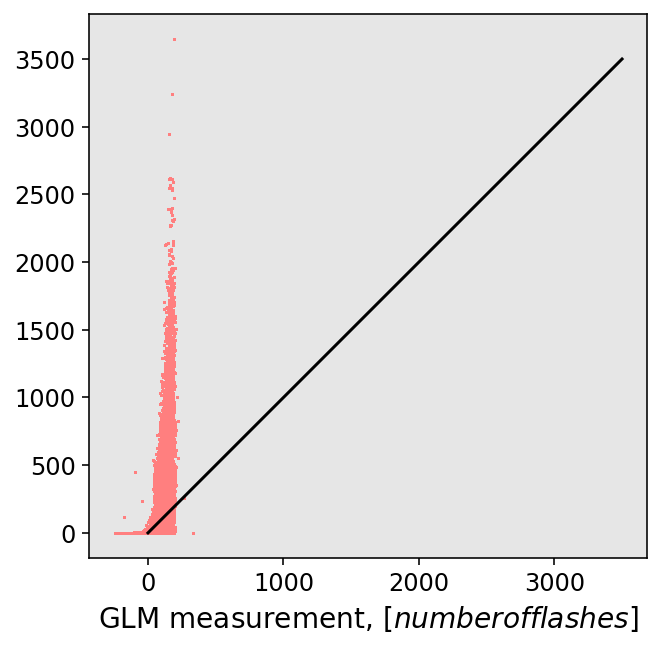

In [26]:
#get predictions 
yhat = model.predict(X_validate)

#make figure  
fig = plt.figure(figsize=(5,5))
#set background color to white so we can copy paste out of the notebook if we want 
fig.set_facecolor('w')

#get axis for drawing
ax = plt.gca()

#plot data 
ax.scatter(yhat,y_validate,color=r,s=1,marker='+')
ax.plot([0,3500],[0,3500],'-k')
ax.set_xlabel('ML Prediction, [$number of flashes$]')
ax.set_xlabel('GLM measurement, [$number of flashes$]')

As you can see, there is not a great correspondance between the ML model predicted flashes and the true number of flashes. 

The metrics for regression are a bit different than for classification. Common metrics are the mean bias, mean absolute error (MAE), Root Mean Square Error (RMSE) and the coefficient of determination (R^2). We have included all of these metrics again in the ```gewitter_functions.py``` script. 